<a href="https://colab.research.google.com/github/niltontac/EspAnalise-EngDados/blob/master/Wholesale_Customers_AplicandoClusteriza%C3%A7%C3%A3oVendasPorAtacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wholesale Customers - Dataset

**Analyst:**

**Nilton Thiago de Andrade Coura**

**Brazil - Recife/Pernambuco**

  * **contact**: niltontac@gmail.com

  * https://github.com/niltontac

  * https://www.linkedin.com/in/niltontac

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Carregando o dataset**

In [2]:
dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [3]:
dados.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Criando uma cópia do dataset selecionando apenas os atributos que serão necessários para análise
dados_features = dados.iloc[:, 2:] 

In [5]:
dados_features

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


**Plotando boxplot de cada atributo do dataset selecionado:**

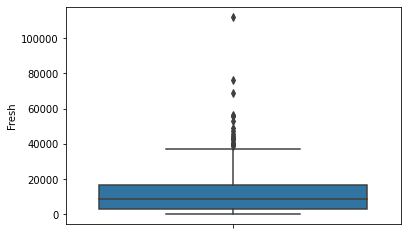

In [6]:
sns.boxplot(y = dados_features['Fresh'])

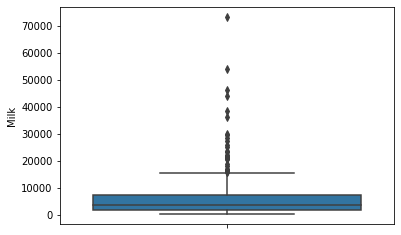

In [7]:
sns.boxplot(y = dados_features['Milk'])

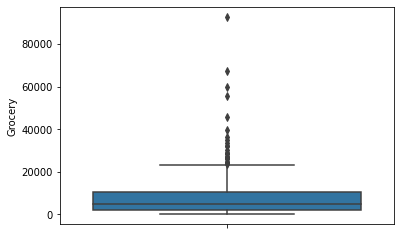

In [8]:
sns.boxplot(y = dados_features['Grocery'])

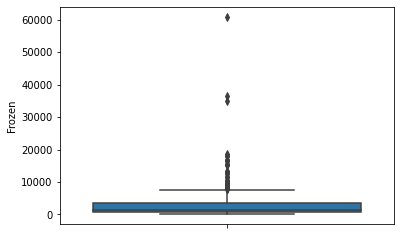

In [9]:
sns.boxplot(y = dados_features['Frozen'])

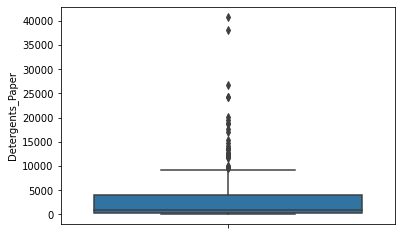

In [10]:
sns.boxplot(y = dados_features['Detergents_Paper'])

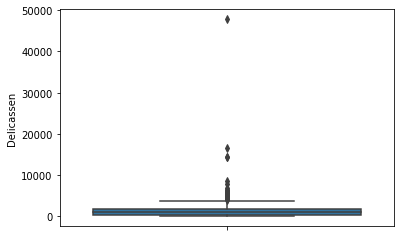

In [11]:
sns.boxplot(y = dados_features['Delicassen'])

In [12]:
# Informações do dataset
dados_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


### Normalizando os dados

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(dados_features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
dados_normalizados = scaler.transform(dados_features)

In [17]:
dados_normalizados_df = pd.DataFrame(dados_normalizados)
dados_normalizados_df.columns = dados_features.columns
dados_normalizados_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Agrupamento - Aplicando modelos de Clusters - KMeans - KMedoids - DBSCAN - Hierarchical

In [18]:
from sklearn.metrics import davies_bouldin_score as db

####KMeans

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Cálculo do wcss
wcss = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(dados_normalizados)
  wcss.append(kmeans.inertia_)

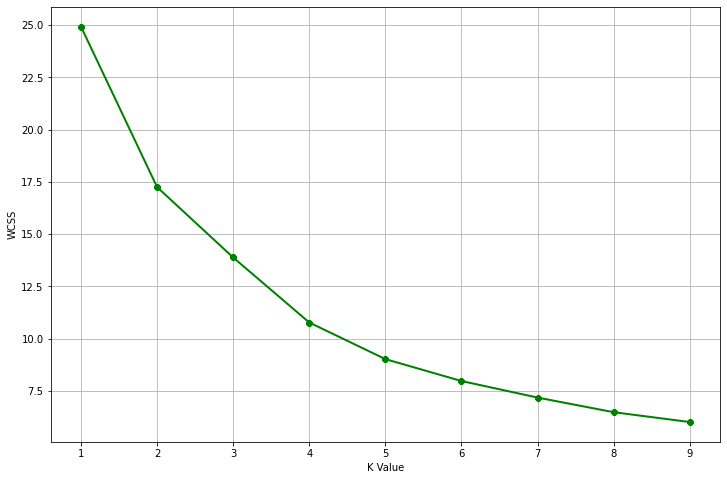

In [21]:
# Plotando o método Elbow (gráfico do cotovelo)
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1, 10), wcss, linewidth=2, color='green', marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.show()

In [22]:
# Aplicando o kmeans com 3 clusters
kmeans = KMeans(n_clusters=3)

In [23]:
kmeans.fit(dados_normalizados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans_labels = kmeans.labels_
kmeans.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [25]:
# Centroide de cada cluster
kmeans.cluster_centers_ 

array([[0.07612741, 0.26781048, 0.31604316, 0.03156052, 0.34516819,
        0.04830937],
       [0.31612924, 0.08086923, 0.07042464, 0.11874307, 0.02650803,
        0.06815213],
       [0.07297318, 0.05468315, 0.06047771, 0.03993169, 0.04513443,
        0.02316561]])

In [26]:
dados['kmeans'] = kmeans_labels
dados

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,2


In [27]:
# Instâncias de cada cluster
dados['kmeans'].value_counts()

2    338
1     61
0     41
Name: kmeans, dtype: int64

In [28]:
# Resultado das métricas definidas
db(dados_features, kmeans.labels_)

0.8907263701523084

####Kmedoids

In [29]:
!pip install scikit-learn-extra

In [30]:
from sklearn_extra.cluster import KMedoids

In [31]:
# Cálculo do wcss
wcss = []
for k in range(1,10):
  kmedoids = KMedoids(metric="manhattan", n_clusters=k)
  kmedoids.fit(dados_normalizados)
  wcss.append(kmedoids.inertia_)

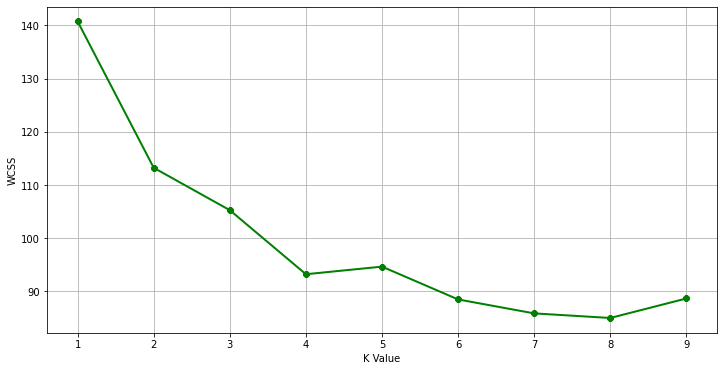

In [32]:
# Plotando o método Elbow (gráfico do "cotovelo")
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,10), wcss, linewidth=2, color="green", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 10, 1))
plt.ylabel("WCSS")
plt.show()

In [33]:
# Aplicando o kmedoids com 3 clusters e métrica de manhattan
kmedoids = KMedoids(metric="manhattan", n_clusters=3)
kmedoids.fit(dados_normalizados)

KMedoids(init='heuristic', max_iter=300, metric='manhattan', n_clusters=3,
         random_state=None)

In [34]:
kmedoids_labels = kmedoids.labels_
kmedoids_labels

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 2,
       1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2,

In [35]:
dados['kmedoids'] = kmedoids_labels

In [36]:
kmedoids.medoid_indices_

array([  9, 162, 172])

In [37]:
dados.iloc[7, :]

Channel                2
Region                 3
Fresh               7579
Milk                4956
Grocery             9426
Frozen              1669
Detergents_Paper    3321
Delicassen          2566
kmeans                 2
kmedoids               2
Name: 7, dtype: int64

In [38]:
# Instâncias de cada cluster
dados['kmedoids'].value_counts()

1    235
2    122
0     83
Name: kmedoids, dtype: int64

In [39]:
dados

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids
0,2,3,12669,9656,7561,214,2674,1338,2,2
1,2,3,7057,9810,9568,1762,3293,1776,2,2
2,2,3,6353,8808,7684,2405,3516,7844,2,2
3,1,3,13265,1196,4221,6404,507,1788,2,1
4,2,3,22615,5410,7198,3915,1777,5185,1,1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,1
436,1,3,39228,1431,764,4510,93,2346,1,1
437,2,3,14531,15488,30243,437,14841,1867,0,0
438,1,3,10290,1981,2232,1038,168,2125,2,1


In [40]:
# Resultado das métricas definidas
db(dados_features, kmedoids.labels_)

1.291392925706566

####DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
# O DBSCAN tem características diferentes de definição das métricas de clusters em relação ao KMeans e KMedoids.

# Nesse caso, usaremos as definições do DBSCAN com eps = 0.3, min_sample=3 e métrica euclidean:

dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
dbscan.fit(dados_normalizados)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [43]:
dbscan_labels = dbscan.labels_

In [44]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [45]:
dados['dbscan'] = dbscan_labels

In [46]:
# Instâncias de cada cluster
dados['dbscan'].value_counts()

 0    434
-1      6
Name: dbscan, dtype: int64

In [47]:
dados

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids,dbscan
0,2,3,12669,9656,7561,214,2674,1338,2,2,0
1,2,3,7057,9810,9568,1762,3293,1776,2,2,0
2,2,3,6353,8808,7684,2405,3516,7844,2,2,0
3,1,3,13265,1196,4221,6404,507,1788,2,1,0
4,2,3,22615,5410,7198,3915,1777,5185,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,1,0
436,1,3,39228,1431,764,4510,93,2346,1,1,0
437,2,3,14531,15488,30243,437,14841,1867,0,0,0
438,1,3,10290,1981,2232,1038,168,2125,2,1,0


In [48]:
# Resultado das métricas definidas
db(dados_features, dbscan.labels_)

1.0297619400665892

####Hierarchical

In [49]:
import scipy.cluster.hierarchy as sch

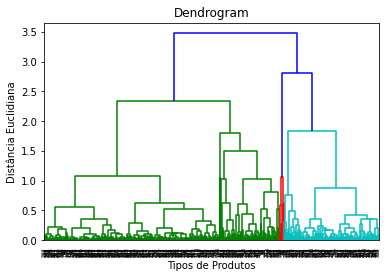

In [50]:
# Plotando o dendograma do método hierarchical
dendrogram = sch.dendrogram(sch.linkage(dados_normalizados, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Tipos de Produtos')
plt.ylabel('Distância Euclidiana')
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
# Aplicando o hierarchical com 6 clusters e métrica de euclidean
agg = AgglomerativeClustering(n_clusters=6, affinity='euclidean')

In [53]:
agg.fit(dados_normalizados)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [54]:
agg_labels = agg.labels_
agg.labels_

array([1, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3, 1, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3,
       3, 4, 3, 2, 3, 4, 1, 3, 0, 3, 1, 3, 4, 3, 1, 3, 1, 2, 3, 3, 1, 4,
       3, 0, 1, 1, 0, 0, 1, 0, 3, 1, 1, 4, 1, 1, 1, 3, 3, 1, 1, 2, 2, 0,
       1, 0, 1, 0, 4, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 1, 3,
       1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 3, 1, 3, 3, 3, 1, 1, 4, 3, 3, 3, 1, 1, 1, 3, 4, 3, 3, 1, 3,
       0, 1, 1, 1, 1, 0, 3, 5, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 3,
       1, 1, 3, 4, 0, 1, 1, 3, 1, 3, 3, 4, 1, 4, 1, 3, 3, 3, 4, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 4, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 3,
       3, 0, 3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1,

In [55]:
dados['Agglomerative'] = agg_labels

In [56]:
# Instâncias de cada cluster
dados['Agglomerative'].value_counts()

1    230
3    101
0     78
4     24
2      5
5      2
Name: Agglomerative, dtype: int64

In [57]:
dados

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids,dbscan,Agglomerative
0,2,3,12669,9656,7561,214,2674,1338,2,2,0,1
1,2,3,7057,9810,9568,1762,3293,1776,2,2,0,3
2,2,3,6353,8808,7684,2405,3516,7844,2,2,0,3
3,1,3,13265,1196,4221,6404,507,1788,2,1,0,0
4,2,3,22615,5410,7198,3915,1777,5185,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,1,0,0
436,1,3,39228,1431,764,4510,93,2346,1,1,0,0
437,2,3,14531,15488,30243,437,14841,1867,0,0,0,4
438,1,3,10290,1981,2232,1038,168,2125,2,1,0,1


In [58]:
# Resultado das métricas definidas
db(dados_features, agg_labels)

1.027015203322794

###Reduzindo dimensionalidade dos modelos com PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)

In [61]:
dados_pca = pca.fit_transform(dados_normalizados)

### Plotando os gráficos com os resultados dos clusters criados por cada modelo com os dados ajustados e normalizados


Kmeans:

In [62]:
dados['kmeans'].value_counts()

2    338
1     61
0     41
Name: kmeans, dtype: int64

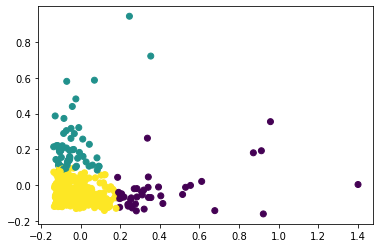

In [63]:
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=dados['kmeans'])

In [64]:
dados_cluster_1 = dados[dados['kmeans'] == 1]

In [65]:
# Dados estatísticos descritivos do cluster 1 criado pelo kmeans
dados_cluster_1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids,dbscan,Agglomerative
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.000000
mean,1.131148,2.606557,35456.262295,5994.278689,6536.786885,7249.803279,1085.163934,3270.213115,1.0,0.934426,-0.049180,0.311475
std,0.340363,0.758918,15511.727947,7007.908461,4957.741657,10115.010873,1355.894430,6461.470101,0.0,0.309238,0.218039,0.940585
min,1.000000,1.000000,11314.000000,286.000000,471.000000,127.000000,10.000000,3.000000,1.0,0.000000,-1.000000,0.000000
25%,1.000000,3.000000,25977.000000,2100.000000,2609.000000,1388.000000,239.000000,1022.000000,1.0,1.000000,0.000000,0.000000
50%,1.000000,3.000000,30624.000000,3944.000000,5091.000000,3915.000000,523.000000,1819.000000,1.0,1.000000,0.000000,0.000000
75%,1.000000,3.000000,40254.000000,7152.000000,8280.000000,9408.000000,1145.000000,2893.000000,1.0,1.000000,0.000000,0.000000
max,2.000000,3.000000,112151.000000,43950.000000,21042.000000,60869.000000,5058.000000,47943.000000,1.0,2.000000,0.000000,5.000000


Kmedoids:

In [66]:
dados['kmedoids'].value_counts()

1    235
2    122
0     83
Name: kmedoids, dtype: int64

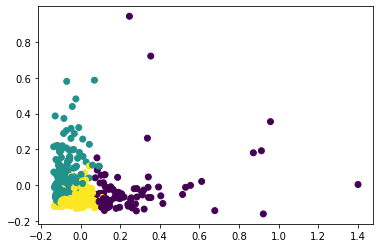

In [67]:
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=dados['kmedoids'])

In [68]:
dados_cluster_2 = dados[dados['kmedoids'] == 2]

In [69]:
# Dados estatísticos descritivos do cluster 2 criado pelo kmedoids
dados_cluster_2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids,dbscan,Agglomerative
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0,122.0,122.000000
mean,1.409836,2.631148,4317.098361,5227.057377,6574.590164,1482.106557,2404.778689,1233.106557,1.991803,2.0,0.0,1.868852
std,0.493831,0.706532,4743.495699,3225.653615,3611.875783,2485.118444,1893.799013,1254.506494,0.090536,0.0,0.0,1.044077
min,1.000000,1.000000,3.000000,55.000000,137.000000,52.000000,5.000000,3.000000,1.000000,2.0,0.0,0.000000
25%,1.000000,3.000000,978.000000,3199.000000,3271.250000,402.000000,530.750000,296.500000,2.000000,2.0,0.0,1.000000
50%,1.000000,3.000000,2660.000000,4995.500000,6772.500000,824.000000,2357.000000,965.500000,2.000000,2.0,0.0,1.000000
75%,2.000000,3.000000,5941.250000,6974.500000,9605.500000,1425.000000,3904.500000,1738.250000,2.000000,2.0,0.0,3.000000
max,2.000000,3.000000,27082.000000,18664.000000,16483.000000,17866.000000,7271.000000,7844.000000,2.000000,2.0,0.0,3.000000


DBSCAN:

In [70]:
dados['dbscan'].value_counts()

 0    434
-1      6
Name: dbscan, dtype: int64

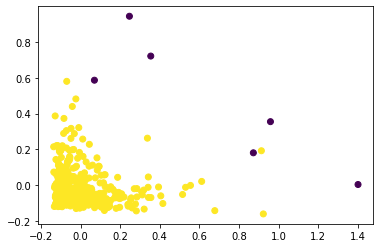

In [71]:
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=dados['dbscan'])

In [72]:
dados_cluster_0 = dados[dados['dbscan'] == 0]

In [73]:
# Dados estatísticos descritivos do cluster 0 criado pelo DBSCAN
dados_cluster_0.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids,dbscan,Agglomerative
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.0,434.000000
mean,1.320276,2.539171,11555.087558,5267.377880,7525.698157,2828.817972,2710.437788,1379.099078,1.691244,1.101382,0.0,1.458525
std,0.467121,0.777623,11560.381433,5496.627921,8216.846090,3609.953793,4234.589656,1688.613454,0.624050,0.672006,0.0,1.184731
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,2.000000,3098.500000,1515.750000,2146.250000,724.250000,256.250000,405.250000,2.000000,1.000000,0.0,1.000000
50%,1.000000,3.000000,8257.500000,3607.500000,4725.000000,1510.500000,811.000000,960.500000,2.000000,1.000000,0.0,1.000000
75%,2.000000,3.000000,16640.750000,7063.000000,10391.000000,3491.000000,3879.250000,1779.000000,2.000000,2.000000,0.0,3.000000
max,2.000000,3.000000,76237.000000,38369.000000,67298.000000,35009.000000,38102.000000,16523.000000,2.000000,2.000000,0.0,4.000000


Hierarchical:

In [74]:
dados['Agglomerative'].value_counts()

1    230
3    101
0     78
4     24
2      5
5      2
Name: Agglomerative, dtype: int64

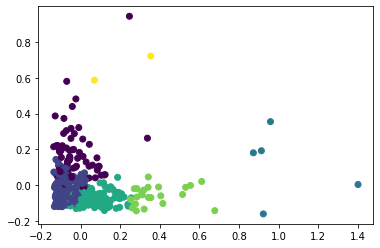

In [75]:
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=dados['Agglomerative'])

In [76]:
dados_cluster_3 = dados[dados['Agglomerative'] == 3]

In [77]:
# Dados estatísticos descritivos do cluster 3 criado pelo Hierarchical
dados_cluster_3.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,kmedoids,dbscan,Agglomerative
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.0
mean,1.742574,2.544554,4220.376238,7674.752475,12397.366337,1355.950495,5265.732673,1272.772277,1.782178,1.108911,0.0,3.0
std,0.439397,0.781342,3684.383563,3765.364756,5302.373940,1364.466243,2185.812617,1212.671908,0.626162,0.988949,0.0,0.0
min,1.000000,1.000000,9.000000,577.000000,572.000000,25.000000,241.000000,3.000000,0.000000,0.000000,0.0,3.0
25%,1.000000,2.000000,1107.000000,5302.000000,8852.000000,364.000000,3593.000000,323.000000,2.000000,0.000000,0.0,3.0
50%,2.000000,3.000000,3103.000000,7504.000000,11364.000000,930.000000,4973.000000,1080.000000,2.000000,2.000000,0.0,3.0
75%,2.000000,3.000000,6202.000000,10473.000000,15205.000000,1809.000000,6830.000000,1780.000000,2.000000,2.000000,0.0,3.0
max,2.000000,3.000000,15615.000000,20655.000000,28986.000000,6269.000000,10069.000000,7844.000000,2.000000,2.000000,0.0,3.0
